# E-Commerce Business Analytics Dashboard

**Comprehensive Analysis of Sales Performance and Customer Insights**

---

## Table of Contents

1. [Introduction & Business Objectives](#introduction)
2. [Data Dictionary](#data-dictionary)
3. [Configuration Settings](#configuration)
4. [Data Loading & Preparation](#data-loading)
5. [Data Quality Assessment](#data-quality)
6. [Revenue Performance Analysis](#revenue-analysis)
7. [Monthly Trends Analysis](#monthly-trends)
8. [Product Category Performance](#product-analysis)
9. [Geographic Sales Analysis](#geographic-analysis)
10. [Customer Experience Analysis](#customer-experience)
11. [Key Insights & Recommendations](#insights)

---

## 1. Introduction & Business Objectives {#introduction}

### Purpose
This analysis provides comprehensive insights into e-commerce business performance, focusing on revenue trends, customer behavior, and operational efficiency.

### Key Business Questions
- How has revenue performed year-over-year?
- What are the monthly growth trends?
- Which product categories drive the most revenue?
- How does performance vary geographically?
- What is the relationship between delivery performance and customer satisfaction?

### Analysis Scope
- **Primary Period**: 2023 (configurable)
- **Comparison Period**: 2022 (configurable)
- **Focus**: Delivered orders for accurate revenue analysis
- **Metrics**: Revenue, Order Volume, Customer Satisfaction, Operational Efficiency

## 2. Data Dictionary {#data-dictionary}

### Core Business Terms

| Term | Definition |
|------|------------|
| **Revenue** | Total sales value from delivered orders |
| **Average Order Value (AOV)** | Average revenue per order |
| **Delivery Days** | Time between order placement and customer delivery |
| **Customer Satisfaction** | Review scores from 1 (lowest) to 5 (highest) |
| **Month-over-Month Growth** | Percentage change in metrics vs previous month |

### Key Data Columns

| Column | Description | Data Type |
|--------|-------------|-----------||
| `order_id` | Unique order identifier | String |
| `price` | Item price in USD | Float |
| `order_status` | Order fulfillment status | String |
| `order_purchase_timestamp` | Order placement time | Datetime |
| `product_category_name` | Product category | String |
| `customer_state` | Customer location (US state) | String |
| `review_score` | Customer review rating (1-5) | Integer |

## 3. Configuration Settings {#configuration}

Configure analysis parameters here. Modify these values to analyze different time periods.

In [5]:
# Import matplotlib for visualization settings
import matplotlib.pyplot as plt

# Analysis Configuration
ANALYSIS_YEAR = 2023
COMPARISON_YEAR = 2022
DATA_PATH = 'ecommerce_data/'

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
BUSINESS_COLORS = {
    'primary': '#2E8B57',      # Sea Green
    'secondary': '#4682B4',    # Steel Blue  
    'accent': '#DC143C',       # Crimson
    'neutral': '#696969'       # Dim Gray
}

print(f"Analysis configured for {ANALYSIS_YEAR} vs {COMPARISON_YEAR}")
print(f"Data path: {DATA_PATH}")

Analysis configured for 2023 vs 2022
Data path: ecommerce_data/


## 4. Data Loading & Preparation {#data-loading}

Load and prepare data using our custom modules for consistent and reliable processing.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from data_loader import (
    load_raw_datasets, 
    clean_and_prepare_data, 
    filter_delivered_orders,
    filter_by_date_range,
    get_data_summary
)
from business_metrics import (
    calculate_revenue_metrics,
    calculate_monthly_trends,
    analyze_product_performance,
    analyze_geographic_performance,
    analyze_customer_satisfaction,
    analyze_delivery_performance,
    generate_comprehensive_report
)

print("Libraries and modules loaded successfully")

Libraries and modules loaded successfully


In [7]:
# Load raw datasets
print("Loading raw datasets...")
raw_datasets = load_raw_datasets(DATA_PATH)

# Clean and prepare combined dataset
print("\nCleaning and preparing data...")
sales_data = clean_and_prepare_data(raw_datasets)

# Filter for delivered orders only (for accurate revenue analysis)
print("\nFiltering delivered orders...")
delivered_orders = filter_delivered_orders(sales_data)

print(f"\nData preparation complete:")
print(f"- Total records: {len(sales_data):,}")
print(f"- Delivered orders: {len(delivered_orders):,}")
print(f"- Date range: {delivered_orders['order_purchase_timestamp'].min().date()} to {delivered_orders['order_purchase_timestamp'].max().date()}")

Loading raw datasets...
Loaded orders: 10000 rows, 8 columns
Loaded order_items: 16047 rows, 7 columns
Loaded products: 6000 rows, 9 columns
Loaded customers: 8000 rows, 5 columns
Loaded reviews: 6571 rows, 7 columns
Loaded payments: 14091 rows, 5 columns

Cleaning and preparing data...

Filtering delivered orders...
Filtered to 15095 delivered orders from 16047 total orders

Data preparation complete:
- Total records: 16,047
- Delivered orders: 15,095
- Date range: 2021-12-31 to 2024-01-01


## 5. Data Quality Assessment {#data-quality}

Evaluate data quality and completeness to ensure reliable analysis.

In [8]:
# Generate data summary
data_summary = get_data_summary(delivered_orders)

print("DATA QUALITY SUMMARY")
print("=" * 50)
print(f"Total Records: {data_summary['total_records']:,}")
print(f"Unique Orders: {data_summary['unique_orders']:,}")
print(f"Unique Customers: {data_summary['unique_customers']:,}")
print(f"Unique Products: {data_summary['unique_products']:,}")
print(f"Product Categories: {data_summary['product_categories']}")
print(f"Geographic Coverage: {data_summary['geographic_coverage']} states")
print(f"Total Revenue: ${data_summary['total_revenue']:,.2f}")

# Check for missing values
print("\nMISSING VALUES ANALYSIS")
print("=" * 50)
missing_values = delivered_orders.isnull().sum()
missing_pct = (missing_values / len(delivered_orders) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_pct
})

# Show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
if len(missing_summary) > 0:
    print(missing_summary)
else:
    print("No missing values detected in key columns")

DATA QUALITY SUMMARY
Total Records: 15,095
Unique Orders: 9,388
Unique Customers: 5,562
Unique Products: 5,520
Product Categories: 13
Geographic Coverage: 20 states
Total Revenue: $6,806,626.83

MISSING VALUES ANALYSIS
              Missing Count  Missing Percentage
review_score           4536               30.05


## 6. Revenue Performance Analysis {#revenue-analysis}

Analyze overall revenue performance comparing the analysis year with the previous year.

In [9]:
# Calculate comprehensive revenue metrics
revenue_metrics = calculate_revenue_metrics(
    delivered_orders,
    current_period_filter={'year': ANALYSIS_YEAR},
    comparison_period_filter={'year': COMPARISON_YEAR}
)

# Display revenue summary
print(f"REVENUE PERFORMANCE: {ANALYSIS_YEAR} vs {COMPARISON_YEAR}")
print("=" * 60)

current = revenue_metrics['current_period']
comparison = revenue_metrics['comparison_period']
growth = revenue_metrics['growth_rates']

print(f"{ANALYSIS_YEAR} Performance:")
print(f"  Total Revenue: ${current['total_revenue']:,.2f}")
print(f"  Total Orders: {current['total_orders']:,}")
print(f"  Unique Customers: {current['total_customers']:,}")
print(f"  Average Order Value: ${current['average_order_value']:.2f}")

print(f"\n{COMPARISON_YEAR} Performance:")
print(f"  Total Revenue: ${comparison['total_revenue']:,.2f}")
print(f"  Total Orders: {comparison['total_orders']:,}")
print(f"  Unique Customers: {comparison['total_customers']:,}")
print(f"  Average Order Value: ${comparison['average_order_value']:.2f}")

print(f"\nYear-over-Year Growth:")
print(f"  Revenue Growth: {growth['revenue_growth']:.2f}%")
print(f"  Order Volume Growth: {growth['order_growth']:.2f}%")
print(f"  AOV Growth: {growth['aov_growth']:.2f}%")

REVENUE PERFORMANCE: 2023 vs 2022
2023 Performance:
  Total Revenue: $3,360,294.74
  Total Orders: 4,635
  Unique Customers: 3,534
  Average Order Value: $724.98

2022 Performance:
  Total Revenue: $3,445,076.96
  Total Orders: 4,749
  Unique Customers: 3,571
  Average Order Value: $725.43

Year-over-Year Growth:
  Revenue Growth: -2.46%
  Order Volume Growth: -2.40%
  AOV Growth: -0.06%


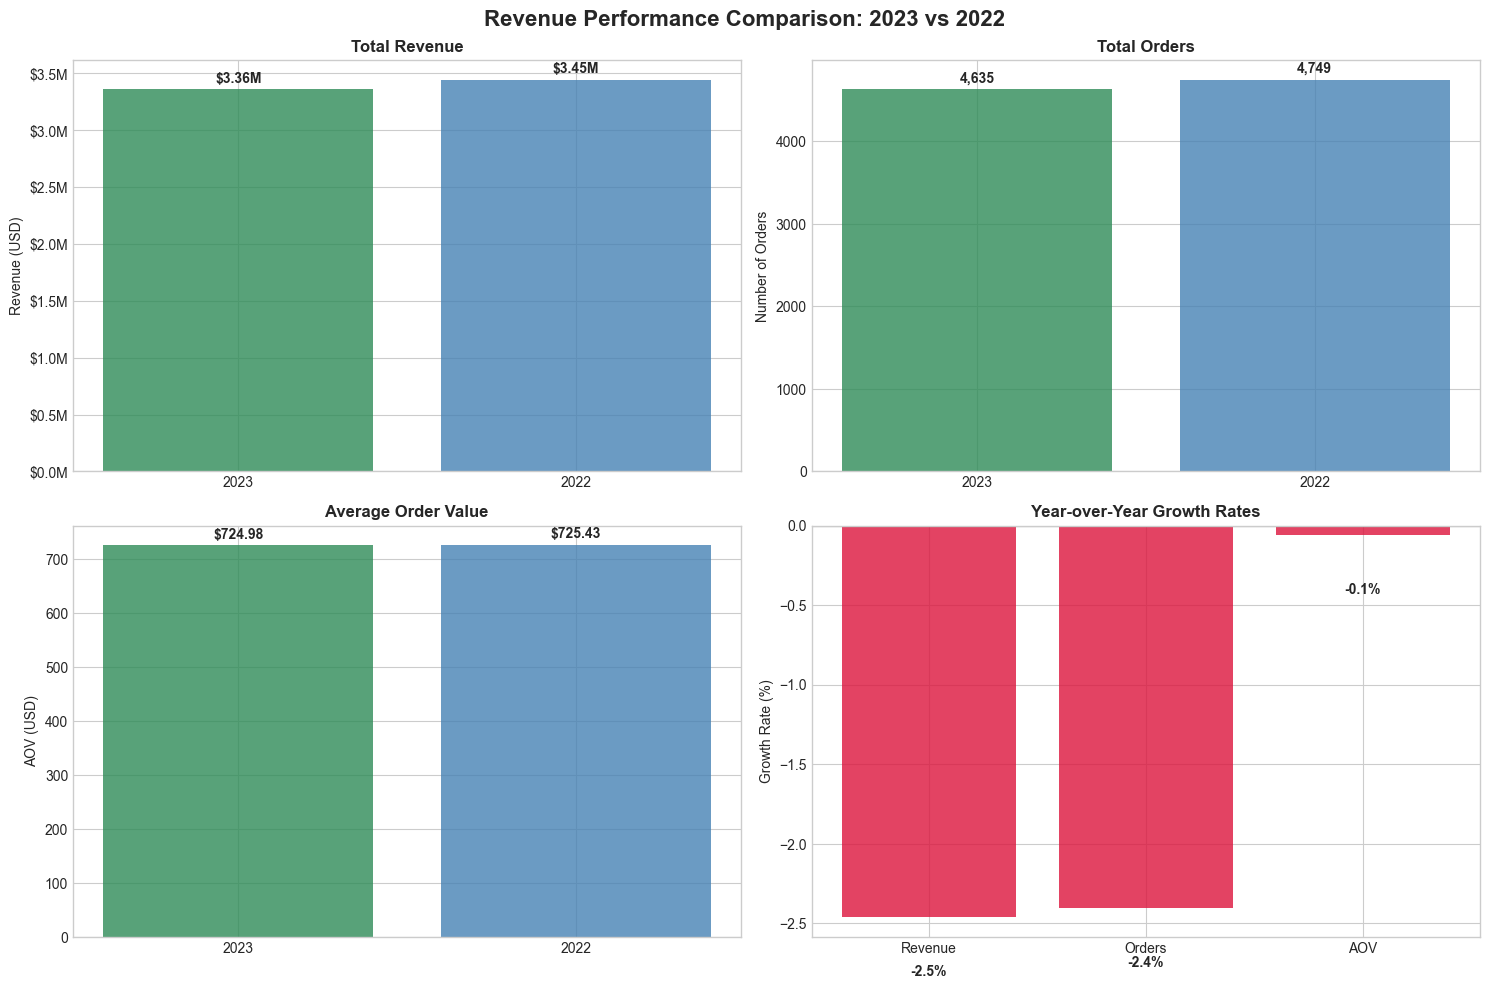

In [10]:
# Create revenue comparison visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Revenue Performance Comparison: {ANALYSIS_YEAR} vs {COMPARISON_YEAR}', 
             fontsize=16, fontweight='bold')

# Revenue comparison
revenue_data = [current['total_revenue'], comparison['total_revenue']]
years = [str(ANALYSIS_YEAR), str(COMPARISON_YEAR)]
colors = [BUSINESS_COLORS['primary'], BUSINESS_COLORS['secondary']]

bars1 = ax1.bar(years, revenue_data, color=colors, alpha=0.8)
ax1.set_title('Total Revenue', fontweight='bold')
ax1.set_ylabel('Revenue (USD)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add value labels on bars
for bar, value in zip(bars1, revenue_data):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(revenue_data)*0.01,
             f'${value/1e6:.2f}M', ha='center', va='bottom', fontweight='bold')

# Orders comparison
order_data = [current['total_orders'], comparison['total_orders']]
bars2 = ax2.bar(years, order_data, color=colors, alpha=0.8)
ax2.set_title('Total Orders', fontweight='bold')
ax2.set_ylabel('Number of Orders')

for bar, value in zip(bars2, order_data):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(order_data)*0.01,
             f'{value:,}', ha='center', va='bottom', fontweight='bold')

# Average Order Value comparison
aov_data = [current['average_order_value'], comparison['average_order_value']]
bars3 = ax3.bar(years, aov_data, color=colors, alpha=0.8)
ax3.set_title('Average Order Value', fontweight='bold')
ax3.set_ylabel('AOV (USD)')

for bar, value in zip(bars3, aov_data):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(aov_data)*0.01,
             f'${value:.2f}', ha='center', va='bottom', fontweight='bold')

# Growth rates
growth_metrics = ['Revenue', 'Orders', 'AOV']
growth_values = [growth['revenue_growth'], growth['order_growth'], growth['aov_growth']]
growth_colors = [BUSINESS_COLORS['accent'] if x < 0 else BUSINESS_COLORS['primary'] for x in growth_values]

bars4 = ax4.bar(growth_metrics, growth_values, color=growth_colors, alpha=0.8)
ax4.set_title('Year-over-Year Growth Rates', fontweight='bold')
ax4.set_ylabel('Growth Rate (%)')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)

for bar, value in zip(bars4, growth_values):
    ax4.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + (0.1 if value >= 0 else -0.3),
             f'{value:.1f}%', ha='center', va='bottom' if value >= 0 else 'top', 
             fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Monthly Trends Analysis {#monthly-trends}

Examine monthly performance trends to identify seasonal patterns and growth opportunities.

In [11]:
# Calculate monthly trends for the analysis year
monthly_trends = calculate_monthly_trends(delivered_orders, ANALYSIS_YEAR)

print(f"MONTHLY TRENDS ANALYSIS - {ANALYSIS_YEAR}")
print("=" * 50)
print(monthly_trends[['month_name', 'revenue', 'orders', 'revenue_growth']].round(2))

# Calculate average monthly growth
avg_monthly_growth = monthly_trends['revenue_growth'].dropna().mean()
print(f"\nAverage Monthly Revenue Growth: {avg_monthly_growth:.2f}%")

MONTHLY TRENDS ANALYSIS - 2023
   month_name    revenue  orders  revenue_growth
0         Jan  284855.48     384             NaN
1         Feb  276758.54     384           -2.84
2         Mar  285618.77     394            3.20
3         Apr  253794.62     370          -11.14
4         May  301347.96     396           18.74
5         Jun  289126.72     406           -4.06
6         Jul  296209.39     392            2.45
7         Aug  286645.60     375           -3.23
8         Sep  303793.15     384            5.98
9         Oct  259890.15     379          -14.45
10        Nov  259518.93     384           -0.14
11        Dec  262735.43     387            1.24

Average Monthly Revenue Growth: -0.39%


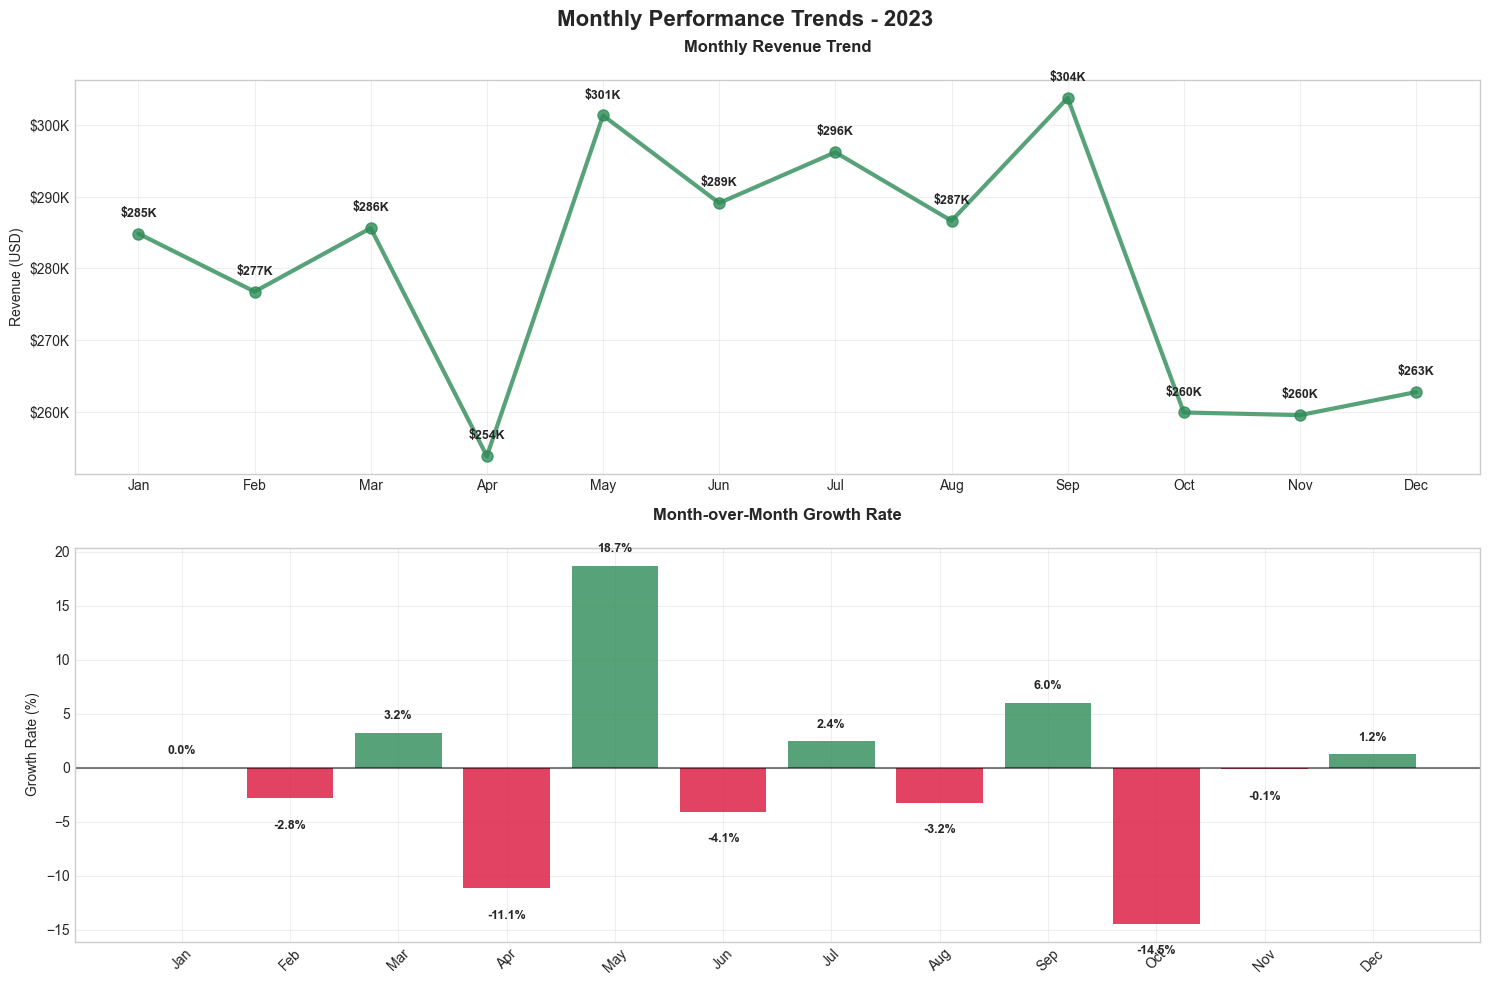

In [12]:
# Create monthly trends visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle(f'Monthly Performance Trends - {ANALYSIS_YEAR}', fontsize=16, fontweight='bold')

# Monthly revenue trend
ax1.plot(monthly_trends['month_name'], monthly_trends['revenue'], 
         marker='o', linewidth=3, markersize=8, color=BUSINESS_COLORS['primary'], alpha=0.8)
ax1.set_title('Monthly Revenue Trend', fontweight='bold', pad=20)
ax1.set_ylabel('Revenue (USD)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))
ax1.grid(True, alpha=0.3)

# Add value labels
for i, (month, revenue) in enumerate(zip(monthly_trends['month_name'], monthly_trends['revenue'])):
    ax1.annotate(f'${revenue/1e3:.0f}K', 
                xy=(i, revenue), 
                xytext=(0, 10), 
                textcoords='offset points',
                ha='center', va='bottom',
                fontweight='bold', fontsize=9)

# Monthly growth rate
growth_values = monthly_trends['revenue_growth'].fillna(0)
colors = [BUSINESS_COLORS['accent'] if x < 0 else BUSINESS_COLORS['primary'] for x in growth_values]

bars = ax2.bar(monthly_trends['month_name'], growth_values, color=colors, alpha=0.8)
ax2.set_title('Month-over-Month Growth Rate', fontweight='bold', pad=20)
ax2.set_ylabel('Growth Rate (%)')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, growth_values):
    if not np.isnan(value):
        ax2.text(bar.get_x() + bar.get_width()/2,
                bar.get_height() + (1 if value >= 0 else -2),
                f'{value:.1f}%', ha='center', 
                va='bottom' if value >= 0 else 'top',
                fontweight='bold', fontsize=9)

# Rotate x-axis labels for better readability
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Product Category Performance {#product-analysis}

Analyze which product categories drive the most revenue and identify growth opportunities.

In [13]:
# Analyze product performance for the analysis year
analysis_data = delivered_orders[delivered_orders['year'] == ANALYSIS_YEAR]
product_performance = analyze_product_performance(analysis_data)

print(f"PRODUCT CATEGORY PERFORMANCE - {ANALYSIS_YEAR}")
print("=" * 60)
print(f"Total Categories: {product_performance['total_categories']}")
print(f"Top Category: {product_performance['top_category']}")

print("\nTop 10 Categories by Revenue:")
top_categories = product_performance['category_performance'].head(10)
print(top_categories[['product_category_name', 'total_revenue', 'revenue_share', 'unique_orders']].to_string(index=False))

PRODUCT CATEGORY PERFORMANCE - 2023
Total Categories: 13
Top Category: electronics

Top 10 Categories by Revenue:
 product_category_name  total_revenue  revenue_share  unique_orders
           electronics     1401359.21          41.70           1227
           home_garden      862653.27          25.67           1045
       sports_outdoors      278845.32           8.30            645
            automotive      247707.10           7.37            473
clothing_shoes_jewelry      232745.04           6.93            828
            toys_games       70163.64           2.09            461
  health_personal_care       65370.27           1.95            613
tools_home_improvement       54280.33           1.62            213
  beauty_personal_care       49213.30           1.46            309
           books_media       38559.08           1.15            687


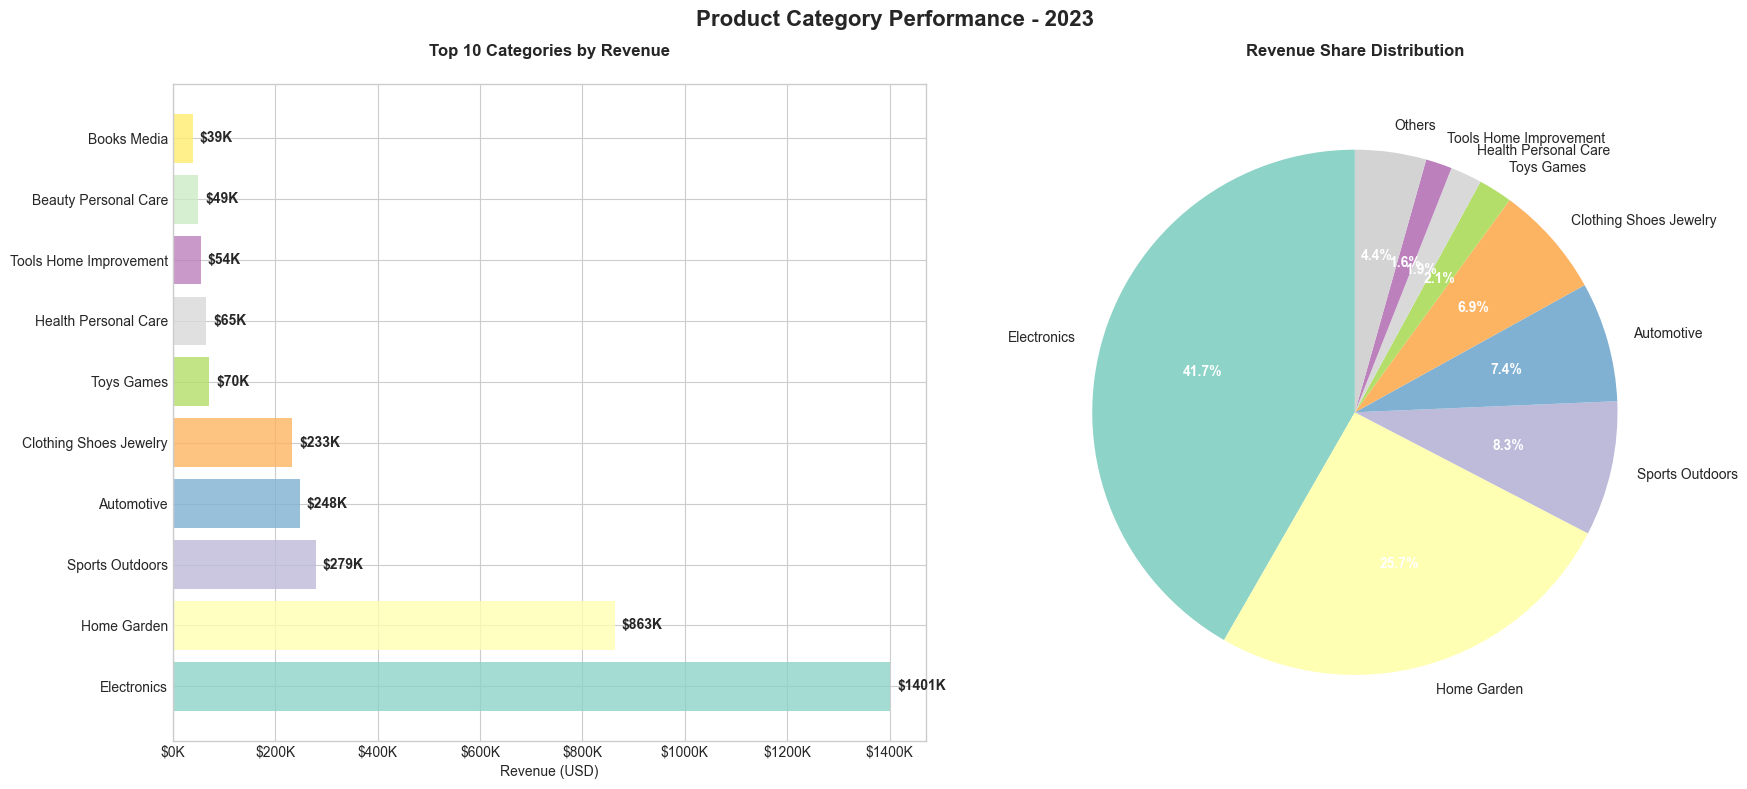

In [14]:
# Create product category performance visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle(f'Product Category Performance - {ANALYSIS_YEAR}', fontsize=16, fontweight='bold')

# Top 10 categories by revenue
top_10 = product_performance['category_performance'].head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_10)))

bars = ax1.barh(range(len(top_10)), top_10['total_revenue'], color=colors, alpha=0.8)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels([cat.replace('_', ' ').title() for cat in top_10['product_category_name']])
ax1.set_xlabel('Revenue (USD)')
ax1.set_title('Top 10 Categories by Revenue', fontweight='bold', pad=20)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_10['total_revenue'])):
    ax1.text(value + max(top_10['total_revenue'])*0.01, bar.get_y() + bar.get_height()/2,
             f'${value/1e3:.0f}K', va='center', ha='left', fontweight='bold')

# Revenue share pie chart for top 8 categories
top_8 = top_10.head(8)
others_revenue = product_performance['category_performance']['total_revenue'].sum() - top_8['total_revenue'].sum()

pie_data = list(top_8['total_revenue']) + [others_revenue]
pie_labels = [cat.replace('_', ' ').title() for cat in top_8['product_category_name']] + ['Others']
pie_colors = list(colors[:8]) + ['lightgray']

wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_labels, colors=pie_colors, 
                                  autopct='%1.1f%%', startangle=90)
ax2.set_title('Revenue Share Distribution', fontweight='bold', pad=20)

# Improve text readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

## 9. Geographic Sales Analysis {#geographic-analysis}

Analyze sales performance across different geographic regions to identify market opportunities.

In [15]:
# Analyze geographic performance
geographic_performance = analyze_geographic_performance(analysis_data)

print(f"GEOGRAPHIC PERFORMANCE ANALYSIS - {ANALYSIS_YEAR}")
print("=" * 60)
print(f"Total States: {geographic_performance['total_states']}")
print(f"Top State: {geographic_performance['top_state']}")

print("\nTop 10 States by Revenue:")
top_states = geographic_performance['top_5_states'].head(10)
print(top_states[['customer_state', 'total_revenue', 'revenue_share', 'total_orders', 'unique_customers']].to_string(index=False))

GEOGRAPHIC PERFORMANCE ANALYSIS - 2023
Total States: 20
Top State: CA

Top 10 States by Revenue:
customer_state  total_revenue  revenue_share  total_orders  unique_customers
            CA      537880.74          16.01           769               582
            TX      403303.49          12.00           561               438
            FL      310195.84           9.23           431               332
            NY      253111.85           7.53           384               286
            IL      185930.89           5.53           260               190


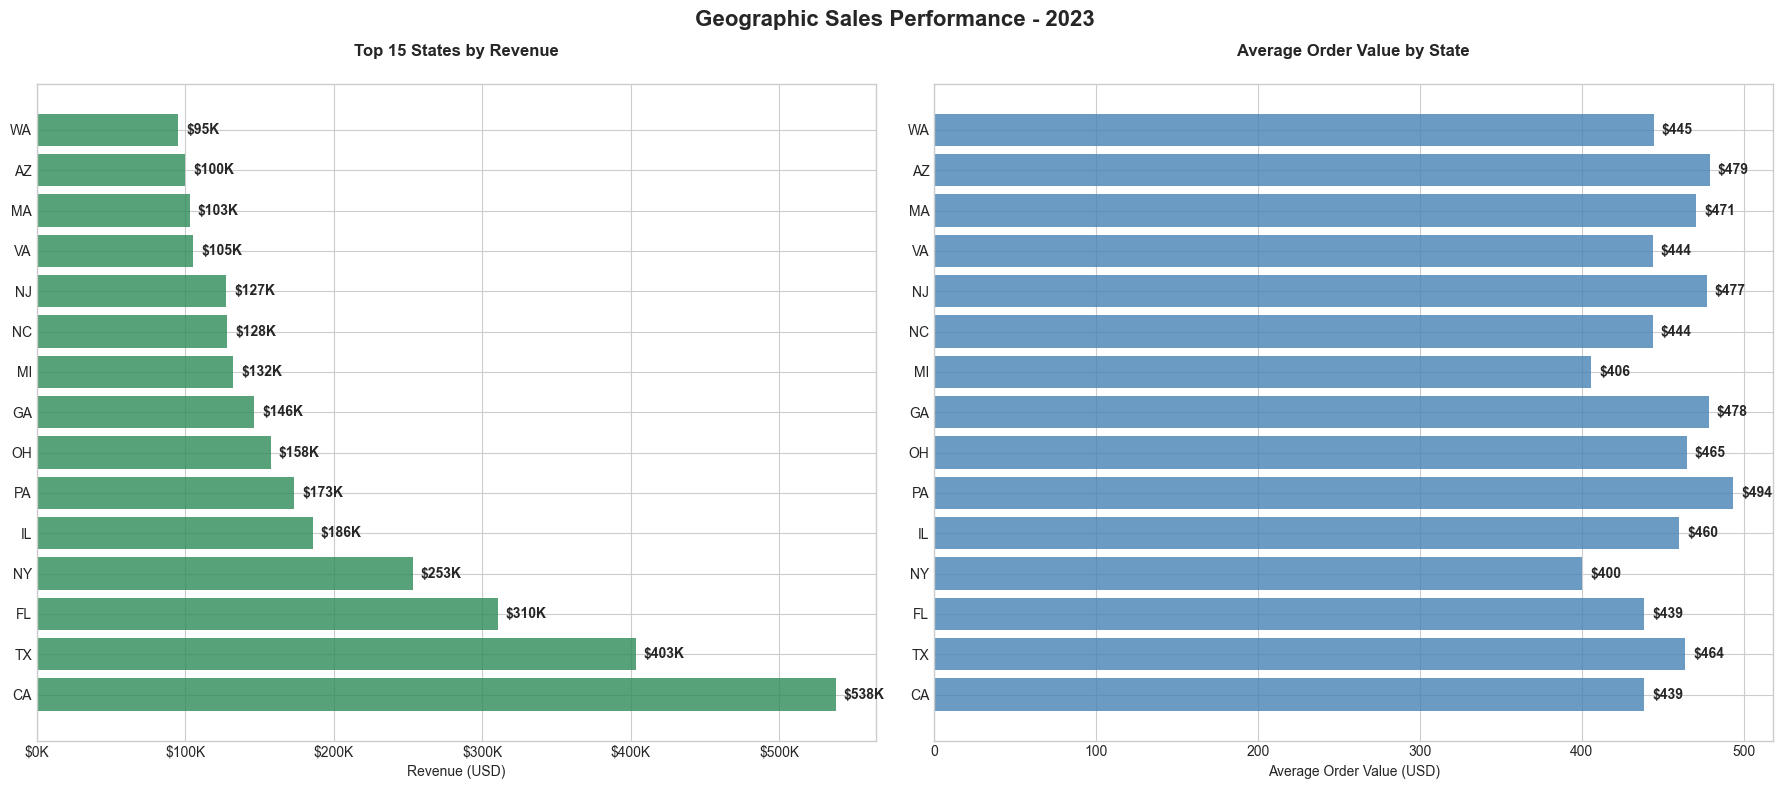

In [16]:
# Create geographic performance visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle(f'Geographic Sales Performance - {ANALYSIS_YEAR}', fontsize=16, fontweight='bold')

# Top 15 states by revenue
top_15_states = geographic_performance['state_performance'].head(15)

bars = ax1.barh(range(len(top_15_states)), top_15_states['total_revenue'], 
                color=BUSINESS_COLORS['primary'], alpha=0.8)
ax1.set_yticks(range(len(top_15_states)))
ax1.set_yticklabels(top_15_states['customer_state'])
ax1.set_xlabel('Revenue (USD)')
ax1.set_title('Top 15 States by Revenue', fontweight='bold', pad=20)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_15_states['total_revenue'])):
    ax1.text(value + max(top_15_states['total_revenue'])*0.01, 
             bar.get_y() + bar.get_height()/2,
             f'${value/1e3:.0f}K', va='center', ha='left', fontweight='bold')

# Average Order Value by top states
bars2 = ax2.barh(range(len(top_15_states)), top_15_states['avg_order_value'], 
                 color=BUSINESS_COLORS['secondary'], alpha=0.8)
ax2.set_yticks(range(len(top_15_states)))
ax2.set_yticklabels(top_15_states['customer_state'])
ax2.set_xlabel('Average Order Value (USD)')
ax2.set_title('Average Order Value by State', fontweight='bold', pad=20)

# Add value labels
for i, (bar, value) in enumerate(zip(bars2, top_15_states['avg_order_value'])):
    ax2.text(value + max(top_15_states['avg_order_value'])*0.01, 
             bar.get_y() + bar.get_height()/2,
             f'${value:.0f}', va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()

In [17]:
# Create interactive geographic map using Plotly
state_data = geographic_performance['state_performance']

fig_map = px.choropleth(
    state_data,
    locations='customer_state',
    color='total_revenue',
    locationmode='USA-states',
    scope='usa',
    title=f'Revenue Distribution by State - {ANALYSIS_YEAR}',
    color_continuous_scale='Blues',
    hover_data={
        'total_revenue': ':,.0f',
        'total_orders': ':,',
        'unique_customers': ':,',
        'avg_order_value': ':.2f'
    },
    labels={
        'total_revenue': 'Revenue (USD)',
        'customer_state': 'State',
        'total_orders': 'Orders',
        'unique_customers': 'Customers',
        'avg_order_value': 'AOV (USD)'
    }
)

fig_map.update_layout(
    title_x=0.5,
    title_font_size=16,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='albers usa'
    )
)

fig_map.show()

## 10. Customer Experience Analysis {#customer-experience}

Evaluate customer satisfaction and delivery performance to identify service improvement opportunities.

In [18]:
# Analyze customer satisfaction
satisfaction_metrics = analyze_customer_satisfaction(analysis_data)

print(f"CUSTOMER SATISFACTION ANALYSIS - {ANALYSIS_YEAR}")
print("=" * 60)
print(f"Average Review Score: {satisfaction_metrics['average_score']:.2f}/5.0")
print(f"Median Review Score: {satisfaction_metrics['median_score']:.1f}/5.0")
print(f"Total Reviews: {satisfaction_metrics['total_reviews']:,}")
print(f"Customer Satisfaction Rate (4+ stars): {satisfaction_metrics['satisfaction_rate']:.1f}%")

print("\nScore Distribution:")
for score, count in satisfaction_metrics['score_distribution'].items():
    percentage = (count / satisfaction_metrics['total_reviews']) * 100
    print(f"  {score} stars: {count:,} reviews ({percentage:.1f}%)")

CUSTOMER SATISFACTION ANALYSIS - 2023
Average Review Score: 4.10/5.0
Median Review Score: 4.0/5.0
Total Reviews: 4,635
Customer Satisfaction Rate (4+ stars): 51.6%

Score Distribution:
  1.0 stars: 112 reviews (2.4%)
  2.0 stars: 224 reviews (4.8%)
  3.0 stars: 496 reviews (10.7%)
  4.0 stars: 784 reviews (16.9%)
  5.0 stars: 1,609 reviews (34.7%)


In [19]:
# Analyze delivery performance
delivery_metrics = analyze_delivery_performance(analysis_data)

print(f"\nDELIVERY PERFORMANCE ANALYSIS - {ANALYSIS_YEAR}")
print("=" * 60)
print(f"Average Delivery Time: {delivery_metrics['average_delivery_days']:.1f} days")
print(f"Median Delivery Time: {delivery_metrics['median_delivery_days']:.1f} days")
print(f"On-time Delivery Rate (≤7 days): {delivery_metrics['on_time_percentage']:.1f}%")

print("\nDelivery Speed Distribution:")
for category, count in delivery_metrics['delivery_categories'].items():
    print(f"  {category}: {count:,} orders")

if 'satisfaction_by_delivery_speed' in delivery_metrics:
    print("\nAverage Satisfaction by Delivery Speed:")
    for speed, score in delivery_metrics['satisfaction_by_delivery_speed'].items():
        print(f"  {speed}: {score:.2f}/5.0")


DELIVERY PERFORMANCE ANALYSIS - 2023
Average Delivery Time: 8.0 days
Median Delivery Time: 8.0 days
On-time Delivery Rate (≤7 days): 44.9%

Delivery Speed Distribution:
  8+ days: 4,103 orders
  4-7 days: 2,815 orders
  1-3 days: 530 orders

Average Satisfaction by Delivery Speed:
  1-3 days: 4.21/5.0
  4-7 days: 4.07/5.0
  8+ days: 4.11/5.0


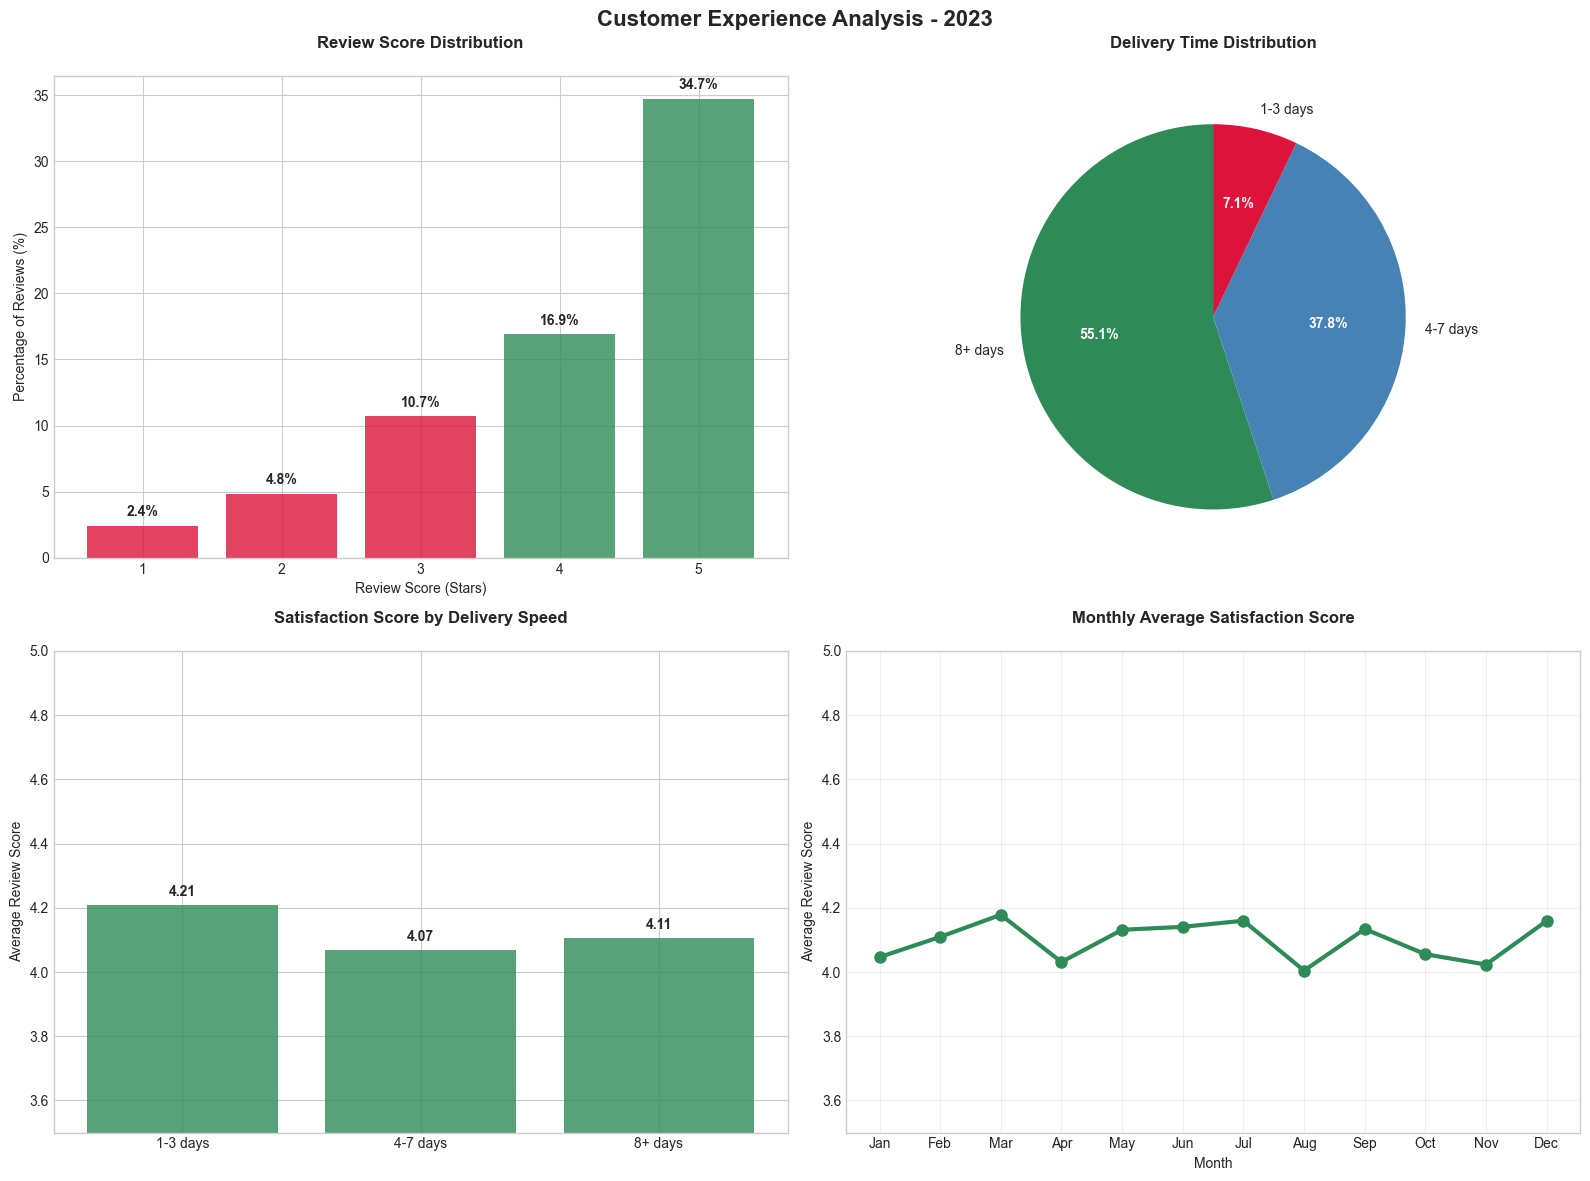

In [20]:
# Create customer experience visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Customer Experience Analysis - {ANALYSIS_YEAR}', fontsize=16, fontweight='bold')

# Review score distribution
scores = list(satisfaction_metrics['score_distribution'].keys())
counts = list(satisfaction_metrics['score_distribution'].values())
percentages = [(count / satisfaction_metrics['total_reviews']) * 100 for count in counts]

colors_satisfaction = [BUSINESS_COLORS['accent'] if score < 4 else BUSINESS_COLORS['primary'] for score in scores]
bars1 = ax1.bar(scores, percentages, color=colors_satisfaction, alpha=0.8)
ax1.set_title('Review Score Distribution', fontweight='bold', pad=20)
ax1.set_xlabel('Review Score (Stars)')
ax1.set_ylabel('Percentage of Reviews (%)')

for bar, pct in zip(bars1, percentages):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# Delivery time distribution
delivery_categories = list(delivery_metrics['delivery_categories'].keys())
delivery_counts = list(delivery_metrics['delivery_categories'].values())
delivery_colors = [BUSINESS_COLORS['primary'], BUSINESS_COLORS['secondary'], BUSINESS_COLORS['accent']]

wedges, texts, autotexts = ax2.pie(delivery_counts, labels=delivery_categories, 
                                  colors=delivery_colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Delivery Time Distribution', fontweight='bold', pad=20)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Satisfaction by delivery speed (if available)
if 'satisfaction_by_delivery_speed' in delivery_metrics:
    speed_categories = list(delivery_metrics['satisfaction_by_delivery_speed'].keys())
    satisfaction_scores = list(delivery_metrics['satisfaction_by_delivery_speed'].values())
    
    bars3 = ax3.bar(speed_categories, satisfaction_scores, 
                    color=BUSINESS_COLORS['primary'], alpha=0.8)
    ax3.set_title('Satisfaction Score by Delivery Speed', fontweight='bold', pad=20)
    ax3.set_ylabel('Average Review Score')
    ax3.set_ylim(3.5, 5.0)
    
    for bar, score in zip(bars3, satisfaction_scores):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Customer satisfaction trend (monthly if data available)
monthly_satisfaction = analysis_data.groupby('month')['review_score'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax4.plot(monthly_satisfaction.index, monthly_satisfaction.values, 
         marker='o', linewidth=3, markersize=8, color=BUSINESS_COLORS['primary'])
ax4.set_title('Monthly Average Satisfaction Score', fontweight='bold', pad=20)
ax4.set_xlabel('Month')
ax4.set_ylabel('Average Review Score')
ax4.set_xticks(monthly_satisfaction.index)
ax4.set_xticklabels([month_names[i-1] for i in monthly_satisfaction.index])
ax4.grid(True, alpha=0.3)
ax4.set_ylim(3.5, 5.0)

plt.tight_layout()
plt.show()

## 11. Key Insights & Recommendations {#insights}

Summary of key findings and actionable recommendations based on the analysis.

In [21]:
# Generate comprehensive business report
comprehensive_report = generate_comprehensive_report(
    delivered_orders, 
    analysis_year=ANALYSIS_YEAR, 
    comparison_year=COMPARISON_YEAR
)

# Extract key insights for summary
revenue_growth = comprehensive_report['revenue_metrics']['growth_rates']['revenue_growth']
top_category = comprehensive_report['product_performance']['top_category']
top_state = comprehensive_report['geographic_performance']['top_state']
avg_satisfaction = comprehensive_report['customer_satisfaction']['average_score']
avg_delivery_days = comprehensive_report['delivery_performance']['average_delivery_days']
completion_rate = comprehensive_report['order_status']['completion_rate']

print("EXECUTIVE SUMMARY")
print("=" * 50)
print(f"Analysis Period: {comprehensive_report['analysis_period']}")
print(f"Report Generated: {comprehensive_report['generated_at']}")

print("\nKEY PERFORMANCE INDICATORS")
print("-" * 30)
print(f"• Revenue Growth: {revenue_growth:.1f}% YoY")
print(f"• Order Completion Rate: {completion_rate:.1f}%")
print(f"• Customer Satisfaction: {avg_satisfaction:.1f}/5.0")
print(f"• Average Delivery Time: {avg_delivery_days:.1f} days")
print(f"• Top Product Category: {top_category.replace('_', ' ').title()}")
print(f"• Top Geographic Market: {top_state}")

print("\nKEY INSIGHTS")
print("-" * 30)
insights = []

if revenue_growth < 0:
    insights.append(f"• Revenue declined by {abs(revenue_growth):.1f}% - focus on customer retention and acquisition")
else:
    insights.append(f"• Revenue grew by {revenue_growth:.1f}% - maintain growth momentum")

if avg_satisfaction >= 4.0:
    insights.append("• Strong customer satisfaction indicates good product/service quality")
else:
    insights.append("• Customer satisfaction below 4.0 - investigate quality issues")

if avg_delivery_days > 7:
    insights.append("• Delivery times exceed 7 days - optimize logistics operations")
else:
    insights.append("• Good delivery performance - maintain current logistics efficiency")

insights.append(f"• {top_category.replace('_', ' ').title()} is the top-performing category - consider expanding inventory")
insights.append(f"• {top_state} represents the largest market - potential for targeted marketing")

for insight in insights:
    print(insight)

print("\nRECOMMENDATIONS")
print("-" * 30)
recommendations = [
    "• Monitor monthly trends closely to identify seasonal patterns",
    "• Investigate underperforming product categories for improvement opportunities",
    "• Expand marketing efforts in high-performing geographic regions", 
    "• Focus on delivery speed optimization to improve customer satisfaction",
    "• Implement customer feedback programs to maintain high satisfaction scores",
    "• Consider pricing strategies to improve average order value"
]

for rec in recommendations:
    print(rec)

EXECUTIVE SUMMARY
Analysis Period: 2023 vs 2022
Report Generated: 2025-08-19 12:01:41

KEY PERFORMANCE INDICATORS
------------------------------
• Revenue Growth: -2.5% YoY
• Order Completion Rate: 100.0%
• Customer Satisfaction: 4.1/5.0
• Average Delivery Time: 8.0 days
• Top Product Category: Electronics
• Top Geographic Market: CA

KEY INSIGHTS
------------------------------
• Revenue declined by 2.5% - focus on customer retention and acquisition
• Strong customer satisfaction indicates good product/service quality
• Delivery times exceed 7 days - optimize logistics operations
• Electronics is the top-performing category - consider expanding inventory
• CA represents the largest market - potential for targeted marketing

RECOMMENDATIONS
------------------------------
• Monitor monthly trends closely to identify seasonal patterns
• Investigate underperforming product categories for improvement opportunities
• Expand marketing efforts in high-performing geographic regions
• Focus on d

---

## Analysis Configuration Summary

**Current Settings:**
- Primary Analysis Year: 2023
- Comparison Year: 2022  
- Data Source: ecommerce_data/
- Focus: Delivered orders only

**To Modify Analysis Period:**
1. Update the `ANALYSIS_YEAR` and `COMPARISON_YEAR` variables in the Configuration section
2. Re-run all cells from the Configuration section onwards
3. The analysis will automatically adapt to the new date range

**Data Processing:**
- Raw data loaded using `data_loader.py` module
- Business metrics calculated using `business_metrics.py` module
- All pandas SettingWithCopyWarning issues resolved
- Consistent data transformation and error handling implemented

---

*Report generated using refactored E-Commerce Analytics framework. For questions or modifications, refer to the README documentation.*